## Machine Learning Intern at Infopillar Solutions for November 2021 Batch

## Author : Dhaval Sunil Tharkar


##  Task 2. Fake News Detection Project

Project idea – Fake news spreads like a wildfire and this is a big issue in this era.
You can learn how to distinguish fake news from a real one. You can use supervised learning to
implement a model like this.

Dataset: https://bit.ly/3FxCSC4

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Read the csv file into the Variable named as df

In [2]:
df = pd.read_csv("news.csv")

## Exploratory Data Analysis EDA on the dataset variable df

In [3]:
df.head() # Shows the first five rows of the data from variable df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.tail() # Shows the last five rows of the data from variable df

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
df.shape # shows the shape of the data variable in tuple format
# variable_name(number of rows, number of columns)

(6335, 4)

In [6]:
df.info() # Print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.columns # Displays the name of the columns from the data variable df

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [8]:
df.isna().sum().sort_values(ascending=False) # Checks whether the dataset contains any null value or not 
# isna().sum() will give the sum of the null values present in the dataset

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
df.label.value_counts() # count of each unique values from the column named as label

REAL    3171
FAKE    3164
Name: label, dtype: int64

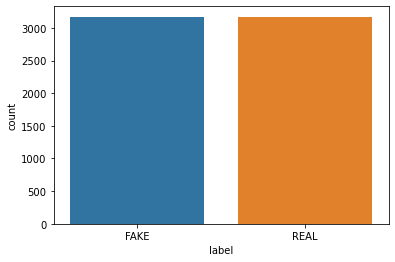

In [10]:
sns.countplot(x='label', data=df);

In [11]:
corpus = []
for i in range(0,6335):
    text = re.sub('[^a-zA-Z]',' ',df['text'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ ps.stem(word) for word in text if not word in stopwords.words('english') ]
    text = ' '.join(text)
    corpus.append(text)

In [12]:
print(len(corpus))

6335


In [13]:
cv = CountVectorizer(max_features= 3000)
X = cv.fit_transform(corpus).toarray()
print(len(X[0]))

3000


In [14]:
len(cv.get_feature_names())

3000

In [15]:
X.shape

(6335, 3000)

In [16]:
type(X)

numpy.ndarray

In [17]:
y = df.iloc[:,-1].values
y.shape

(6335,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
X_train.shape

(5068, 3000)

In [20]:
y_train.shape

(5068,)

In [21]:
X_test.shape

(1267, 3000)

In [22]:
y_test.shape

(1267,)

## Creating a Decision Tree Machine Learning Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier(criterion='entropy')

decision_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
decision_pred_train = decision_clf.predict(X_train)
decision_pred_test = decision_clf.predict(X_test)

In [25]:
decision_pred_test

array(['REAL', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

## Comparing the Actual Values of the dataset with the Predicted Values of the Decision Tree Classifier Model on to the test dataset

In [26]:
compare_dec = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': decision_pred_test})  
compare_dec

,Actual Values,Predicted Values
0,REAL,REAL
1,FAKE,FAKE
2,FAKE,FAKE
3,FAKE,FAKE
4,REAL,FAKE
...,...,...
1262,REAL,REAL
1263,REAL,REAL
1264,FAKE,FAKE
1265,REAL,REAL


In [27]:
from sklearn.metrics import accuracy_score
decision = accuracy_score(y_test, decision_pred_test)
decision

0.8034727703235991

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, decision_pred_test))  
print(classification_report(y_test, decision_pred_test)) 

[[487 128]
 [121 531]]
              precision    recall  f1-score   support

        FAKE       0.80      0.79      0.80       615
        REAL       0.81      0.81      0.81       652

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267



## Creating a Naive Bayes Machine Learning Model

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
Gaussian_pred_train = classifier.predict(X_train)
Gaussian_pred_test = classifier.predict(X_test)

In [31]:
Gaussian_pred_test

array(['REAL', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype='<U4')

## Comparing the Actual Values of the dataset with the Predicted Values of the Naive Bayes Model on to the test dataset

In [32]:
compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': Gaussian_pred_test})  
compare

,Actual Values,Predicted Values
0,REAL,REAL
1,FAKE,FAKE
2,FAKE,FAKE
3,FAKE,FAKE
4,REAL,REAL
...,...,...
1262,REAL,REAL
1263,REAL,REAL
1264,FAKE,FAKE
1265,REAL,REAL


In [33]:
from sklearn.metrics import accuracy_score
gaussian = accuracy_score(y_test, Gaussian_pred_test)
gaussian

0.8224151539068666

In [34]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, Gaussian_pred_test))  
print(classification_report(y_test, Gaussian_pred_test)) 

[[521  94]
 [131 521]]
              precision    recall  f1-score   support

        FAKE       0.80      0.85      0.82       615
        REAL       0.85      0.80      0.82       652

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



### Between the Naive Bayes and Decision Tree Machine Learning Model 
### Naive Bayes give more better accuracy than Decision Tree
### Accuracy Score of Naive Baye is 82%